# **Importing modules**

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Reading the file**

In [244]:
df = pd.read_excel('iris.xls')


In [245]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **preprocessing**

In [246]:
df['SL'].unique()

array([5.1, 4.9, nan, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 4.7,
       5.5, 4.5, 5.3, 7. , 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.4, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [247]:
df['SW'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, nan, 4. , 4.4, 3.8, 3.7,
       3.3, 4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [248]:
df['PL'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, nan, 4.7, 4.5, 4.9,
       4. , 4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8,
       3.7, 5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.1, 6.4, 5.4, 5.2])

In [249]:
df['PW'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [250]:
df['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [251]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# **Replacing null values with median values**

In [252]:
#finding median
print('Iris-setosa')
setosa = df['Classification']=='Iris-setosa'
print(df[setosa].median())
print('Iris-versicolor')
versicolor = df['Classification']=='Iris-versicolor'
print(df[versicolor].median())
print('Iris-virginica')
virginica= df['Classification']=='Iris-virginica'
print(df[virginica].median())

Iris-setosa
SL    5.0
SW    3.4
PL    1.5
PW    0.2
dtype: float64
Iris-versicolor
SL    5.85
SW    2.80
PL    4.35
PW    1.30
dtype: float64
Iris-virginica
SL    6.50
SW    3.00
PL    5.55
PW    2.00
dtype: float64


<ipython-input-252-a3b79e4469b1>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[setosa].median())
<ipython-input-252-a3b79e4469b1>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[versicolor].median())
<ipython-input-252-a3b79e4469b1>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[virginica].median())


In [253]:
median_sl_by_species = df.groupby('Classification')['SL'].median().to_dict()
df['SL'] = df.apply(lambda x: median_sl_by_species[x['Classification']] if pd.isna(x['SL'])else x['SL'],axis=1)

In [254]:
median_sw_by_species = df.groupby('Classification')['SW'].median().to_dict()
df['SW'] = df.apply(lambda x: median_sw_by_species[x['Classification']] if pd.isna(x['SW'])else x['SW'],axis=1)

In [255]:
median_pl_by_species = df.groupby('Classification')['PL'].median().to_dict()
df['PL'] = df.apply(lambda x: median_pl_by_species[x['Classification']] if pd.isna(x['SL'])else x['SL'],axis=1)

In [256]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,5.1,0.2,Iris-setosa
1,4.9,3.0,4.9,0.2,Iris-setosa
2,5.0,3.2,5.0,0.2,Iris-setosa
3,4.6,3.1,4.6,0.2,Iris-setosa
4,5.0,3.6,5.0,0.2,Iris-setosa


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [258]:
df.shape

(150, 5)

In [259]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.847333,3.052667,5.847333,1.198667
std,0.820905,0.425795,0.820905,0.763161
min,4.300000,2.000000,4.300000,0.100000
25%,5.100000,2.800000,5.100000,0.300000
50%,5.800000,3.000000,5.800000,1.300000
75%,6.400000,3.300000,6.400000,1.800000
max,7.900000,4.400000,7.900000,2.500000


In [260]:
corr=df.corr()
corr

,SL,SW,PL,PW
SL,1.000000,-0.134481,1.000000,0.825258
SW,-0.134481,1.000000,-0.134481,-0.357917
PL,1.000000,-0.134481,1.000000,0.825258
PW,0.825258,-0.357917,0.825258,1.000000


<AxesSubplot:>

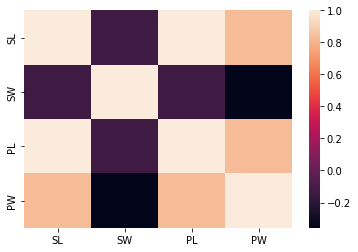

In [261]:
sns.heatmap(corr)

## **Label encoding**

In [262]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [263]:
df['Classification'] = le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,5.1,0.2,0
1,4.9,3.0,4.9,0.2,0
2,5.0,3.2,5.0,0.2,0
3,4.6,3.1,4.6,0.2,0
4,5.0,3.6,5.0,0.2,0


# **Model training**

# **Logistic regression**

In [264]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Classification'])
y=df['Classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [265]:
y_pred = model.predict(x_test)

In [266]:
print('Accuracy:',model.score(x_test,y_test)*100)

Accuracy: 100.0


In [267]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# **kNN**

In [268]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  model = classifier.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

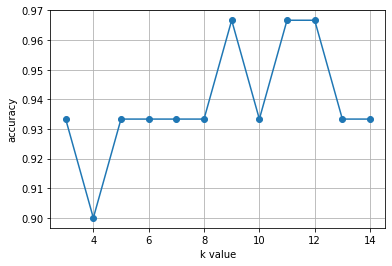

In [269]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [270]:
print('Accuracy:',model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


# **Decision Tree**

In [271]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [272]:
y_pred_dt=dt_clf.predict(x_test)

In [273]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_dt))
print("confusion matrix:",confusion_matrix(y_test,y_pred_dt))

accuracy : 0.9666666666666667
confusion matrix: [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# **SVM**

In [274]:
from sklearn.svm import SVC

In [275]:
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)

In [276]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_svm))
print("confusion matrix:",confusion_matrix(y_test,y_pred_svm))

accuracy : 0.9666666666666667
confusion matrix: [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# **RandomForest**

In [277]:
from sklearn.ensemble import RandomForestClassifier

In [278]:
rf_clf=RandomForestClassifier(n_estimators=50,random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [279]:
y_pred_rf=rf_clf.predict(x_test)

In [280]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [281]:
print("accuracy :",accuracy_score(y_test,y_pred_rf))
print("confusion matrix:",confusion_matrix(y_test,y_pred_rf))

accuracy : 0.9666666666666667
confusion matrix: [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# **I got logistic regression as the best result with accuracy 100 **

